<a href="https://colab.research.google.com/github/dishaabhat/DAV-Lab-Sem-6/blob/main/DAV_Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

# Python


In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("/content/student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,no,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,yes,3,2,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,4,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,no,yes,4,5,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,no,5,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,no,yes,4,1,5,0,11,12,10


<ipython-input-8-b9c42c180cfc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


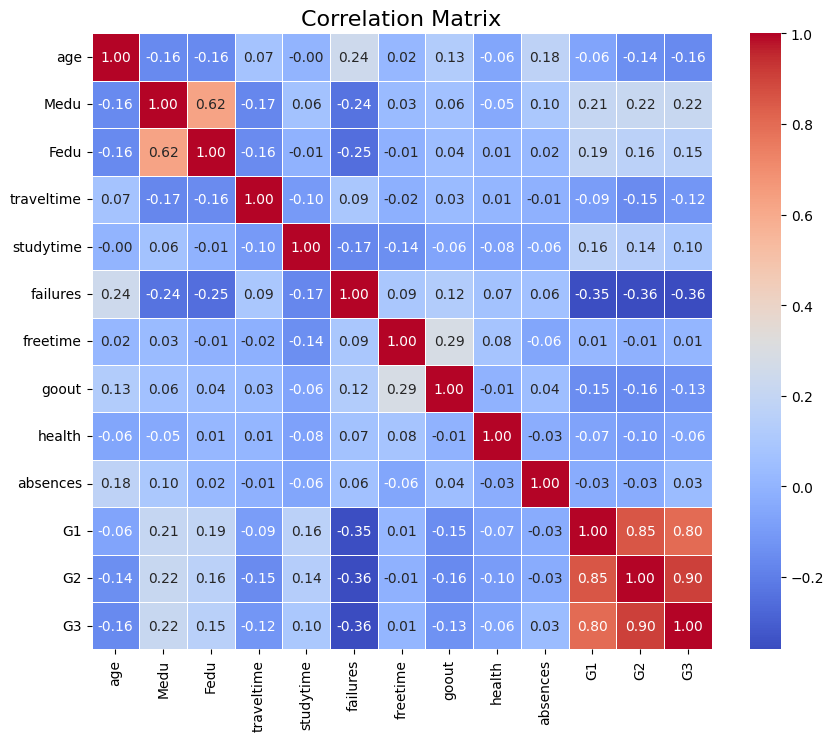

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

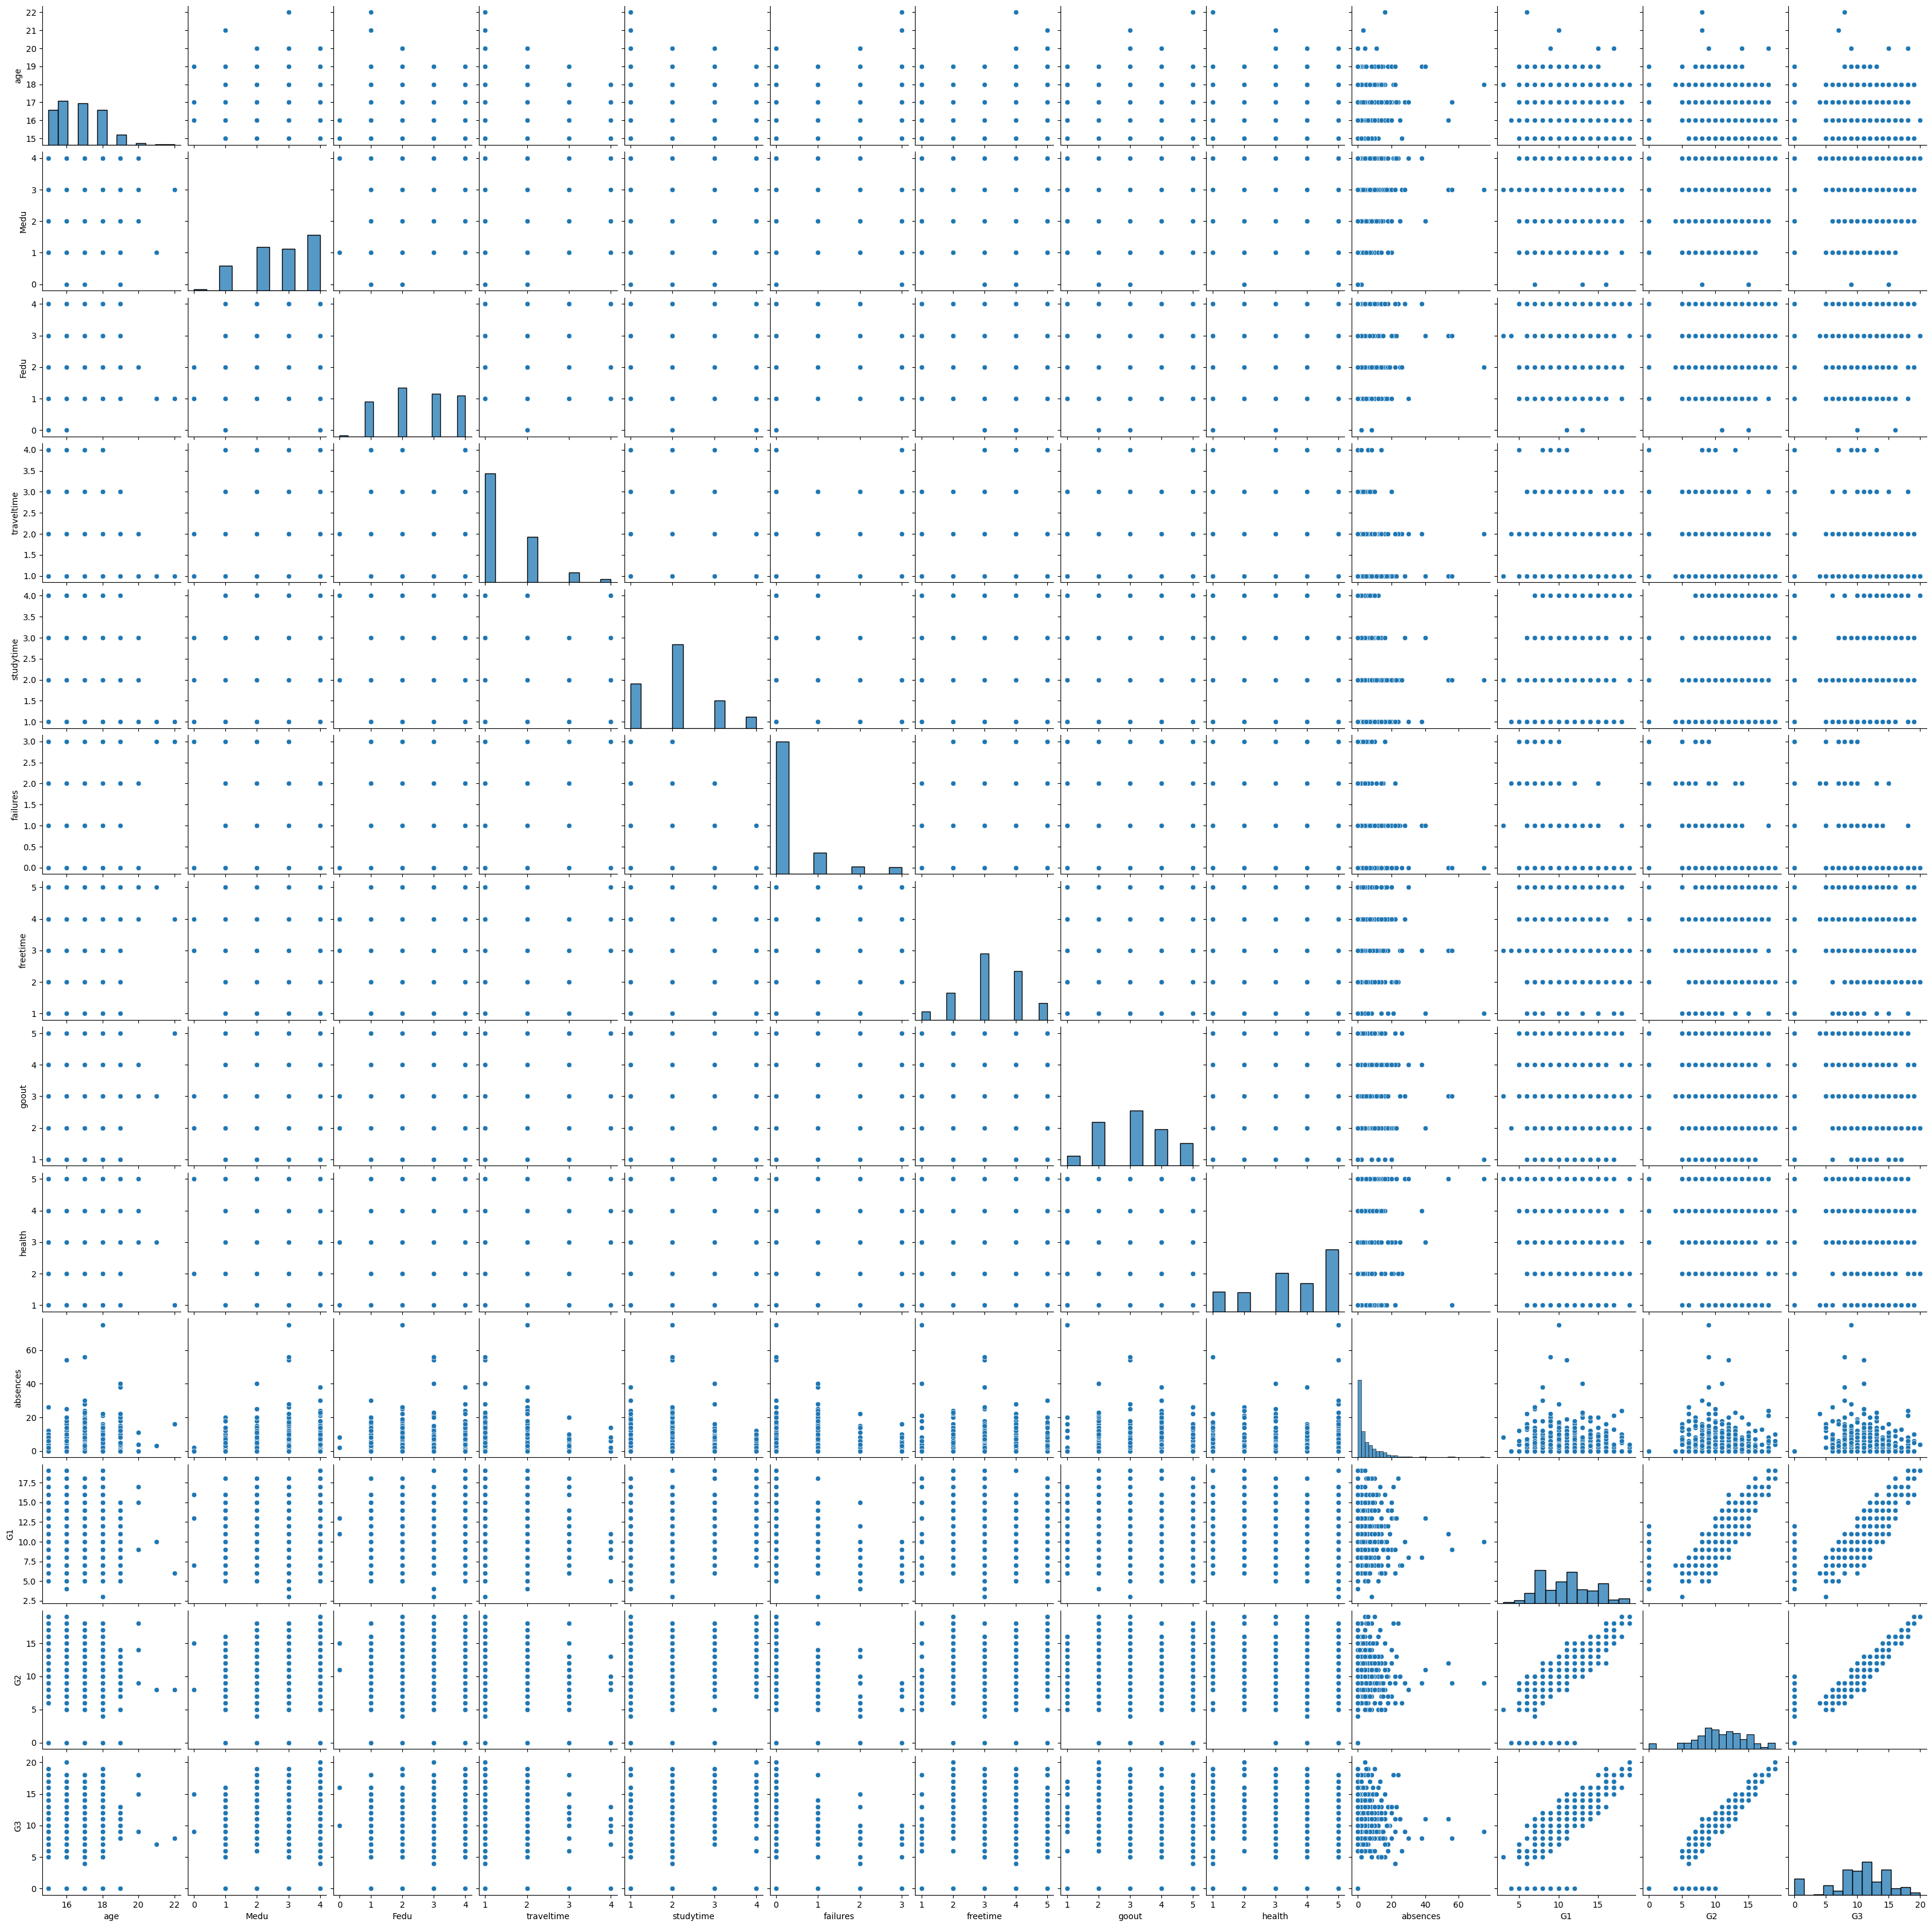

In [ ]:
sns.pairplot(df)
plt.show()

In [9]:
df.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
guardian        0
traveltime      0
studytime       0
failures        0
Ssupport        0
Gsupport        0
feespaid        0
ecactivities    0
internet        0
freetime        0
goout           0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
y = df['G3']
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [12]:
num = df.select_dtypes(include=['number'])
num


,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3
0,18,4,4,2,2,0,3,4,3,6,5,6,6
1,17,1,1,1,2,0,3,3,3,4,5,5,6
2,15,1,1,1,2,3,3,2,3,10,7,8,10
3,15,4,2,1,3,0,2,2,5,2,15,14,15
4,16,3,3,1,2,0,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,4,4,11,9,9,9
391,17,3,1,2,1,0,4,5,2,3,14,16,16
392,21,1,1,1,1,3,5,3,3,3,10,8,7
393,18,3,2,3,1,0,4,1,5,0,11,12,10


In [13]:
X = num.drop('G3', axis=1)
X

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2
0,18,4,4,2,2,0,3,4,3,6,5,6
1,17,1,1,1,2,0,3,3,3,4,5,5
2,15,1,1,1,2,3,3,2,3,10,7,8
3,15,4,2,1,3,0,2,2,5,2,15,14
4,16,3,3,1,2,0,3,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,4,4,11,9,9
391,17,3,1,2,1,0,4,5,2,3,14,16
392,21,1,1,1,1,3,5,3,3,3,10,8
393,18,3,2,3,1,0,4,1,5,0,11,12


In [14]:
#split the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#finding the slope and intercept
intercept = model.intercept_
coefficients = model.coef_
print(f'Intercept: {intercept:.2f}')
print('Coefficients:')
for i, coef in enumerate(coefficients):
    print(f'   Coefficient for X{i + 1}: {coef:.2f}')

Intercept: 0.45
Coefficients:
   Coefficient for X1: -0.19
   Coefficient for X2: 0.08
   Coefficient for X3: -0.19
   Coefficient for X4: 0.15
   Coefficient for X5: -0.03
   Coefficient for X6: -0.45
   Coefficient for X7: 0.04
   Coefficient for X8: 0.16
   Coefficient for X9: 0.07
   Coefficient for X10: 0.04
   Coefficient for X11: 0.16
   Coefficient for X12: 0.98


In [18]:
y_pred = model.predict(X_test)
y_pred

array([ 5.86795313, 12.08376112,  3.01633564,  8.81394794,  7.47517679,
       12.57648373, 18.95426441,  7.47413431,  7.0137512 , 12.7479442 ,
       14.80177227,  6.18008344, 13.99488993, 11.48815927, 14.55381902,
        7.83147672,  6.57850916, 10.62862121, 15.03076882,  8.49216156,
       14.14697131, 16.67768405, 15.1281131 ,  4.73772073,  8.06489346,
       20.30756514, 10.51653143,  8.9965545 , 17.14994552, 11.69392124,
        9.02958832,  7.35816206, 14.71263616, 12.7959722 ,  5.99551625,
        4.11416331, -2.11252104, 15.09797451, 12.12999813,  7.54093681,
        5.04582171, 10.4620732 , 13.9924809 ,  7.89585352, 15.7131575 ,
        9.80425898, 12.34165824, 14.14554016, 13.22301805, 15.39273432,
       13.22881501, 14.85692392, 10.28800266,  7.71516889,  4.17540027,
       13.13283489,  9.88462173,  6.22001402, 15.32383866, 16.41338464,
       13.20813091,  8.4345027 ,  6.6937548 ,  4.05870289,  4.78528151,
       16.73792295,  8.10893239,  9.4022248 ,  9.58316773, 15.60

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.66000833510206


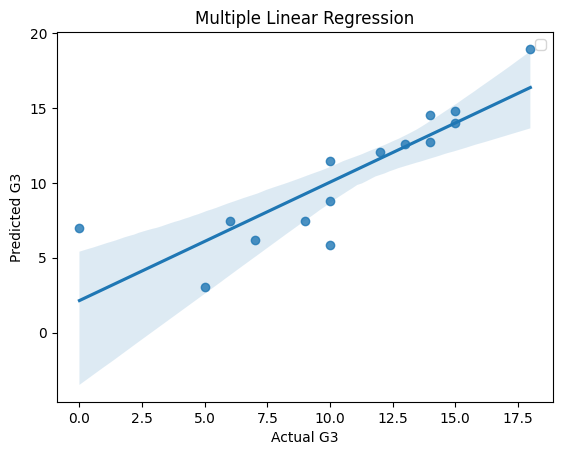

In [ ]:
indices_to_plot = slice(0, 15)
sns.regplot(x=y_test[indices_to_plot], y=y_pred[indices_to_plot])
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

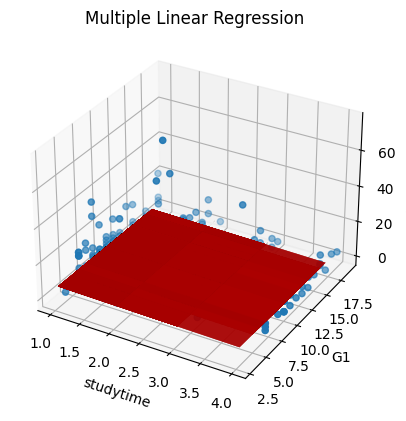

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['studytime']
y = df['G1']
z = df['absences']

ax.scatter(x, y, z)

A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, color='red')

ax.set_xlabel('studytime')
ax.set_ylabel('G1')
ax.set_zlabel('Absenses')
plt.title('Multiple Linear Regression')

plt.show()

# R

In [ ]:
library(ggplot2)
library(dplyr)
library(broom)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
csv_file_path <- "/content/student-mat.csv"
my_data <- read.csv(csv_file_path)
str(my_data)

'data.frame':	395 obs. of  26 variables:
 $ school      : chr  "GP" "GP" "GP" "GP" ...
 $ sex         : chr  "F" "F" "F" "F" ...
 $ age         : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address     : chr  "U" "U" "U" "U" ...
 $ famsize     : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus     : chr  "A" "T" "T" "T" ...
 $ Medu        : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu        : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob        : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob        : chr  "teacher" "other" "other" "services" ...
 $ guardian    : chr  "mother" "father" "mother" "mother" ...
 $ traveltime  : int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime   : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures    : int  0 0 3 0 0 0 0 0 0 0 ...
 $ Ssupport    : chr  "yes" "no" "yes" "no" ...
 $ Gsupport    : chr  "no" "yes" "no" "yes" ...
 $ feespaid    : chr  "no" "no" "yes" "yes" ...
 $ ecactivities: chr  "no" "no" "no" "yes" ...
 $ internet    : chr  "no" "yes" "yes" "yes" ...
 $ freetime    : int 

In [ ]:
library(ggplot2)

In [ ]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
X <- subset(my_data, select = -G3)

In [ ]:
y <- data.frame(Y = my_data$G3)


In [ ]:
set.seed(123)
split <- sample.split(y$Y, SplitRatio = 0.7)

#training and testing datasets for X
x_train <- subset(X, split == TRUE)
x_test <- subset(X, split == FALSE)

#training and testing datasets for Y
y_train <- subset(y, split == TRUE)
y_test <- subset(y, split == FALSE)

In [ ]:
model <- lm(Y ~ ., data = cbind(y_train, x_train))


In [ ]:
summary(model)
predictions <- predict(model, newdata = x_test)
# print(predictions)


Call:
lm(formula = Y ~ ., data = cbind(y_train, x_train))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6919 -0.4725  0.2556  0.9884  4.0939 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.219755   2.317544  -0.526  0.59915    
schoolMS         0.300499   0.465662   0.645  0.51933    
sexM             0.078848   0.275389   0.286  0.77488    
age             -0.096145   0.116883  -0.823  0.41156    
addressU         0.221150   0.326505   0.677  0.49884    
famsizeLE3      -0.056857   0.271653  -0.209  0.83439    
PstatusT        -0.242754   0.404350  -0.600  0.54883    
Medu             0.129972   0.178672   0.727  0.46766    
Fedu            -0.214220   0.154425  -1.387  0.16664    
Mjobhealth       0.278531   0.593828   0.469  0.63946    
Mjobother        0.343445   0.403780   0.851  0.39584    
Mjobservices     0.332685   0.447313   0.744  0.45775    
Mjobteacher     -0.332903   0.584487  -0.570  0.56950    
Fjobhealth       0.7

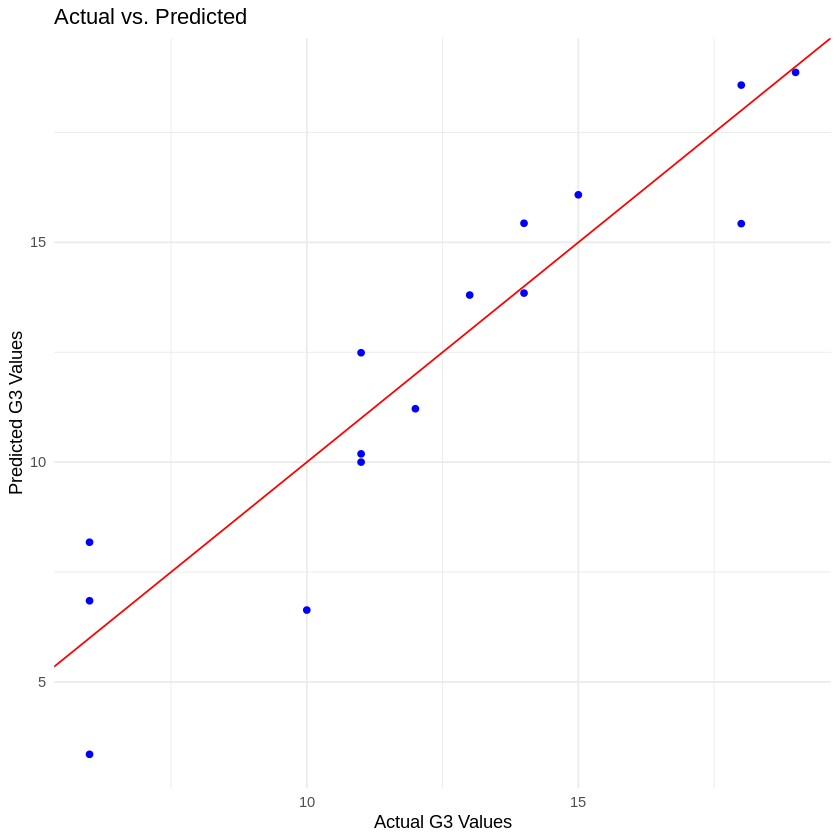

In [ ]:
library(ggplot2)
plot_data <- data.frame(Actual = y_test$Y[1:15], Predicted = predictions[1:15])
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = 'blue') +
  geom_abline(intercept = 0, slope = 1, color = 'red') +
  labs(x = 'Actual G3 Values', y = 'Predicted G3 Values', title = 'Actual vs. Predicted ') +
  theme_minimal()